---
## **Zpracovavaci skript**

No handles with labels found to put in legend.


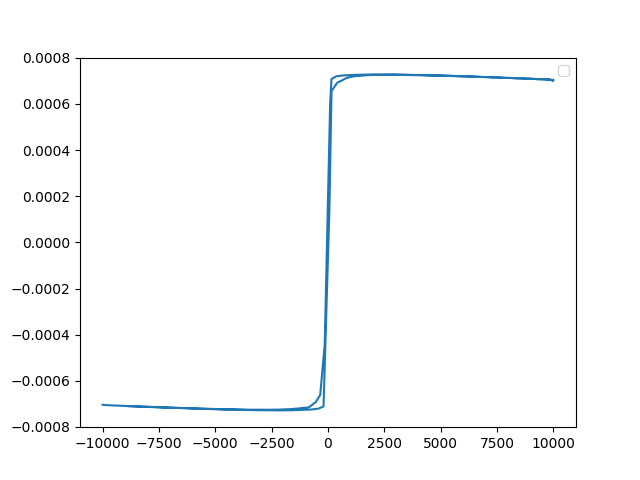

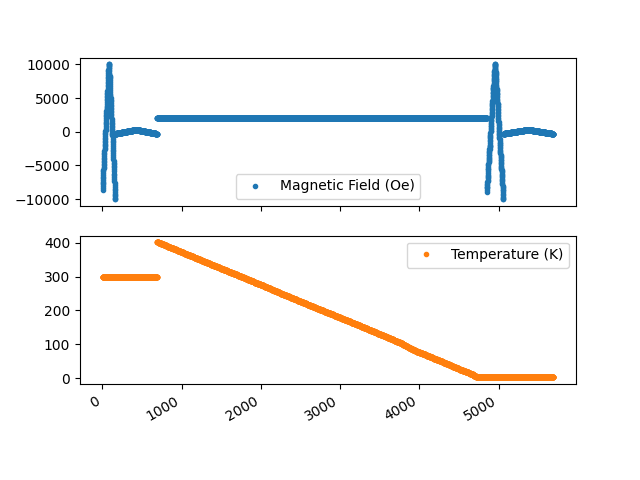

In [33]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math
%matplotlib widget



# root = Tk()
# root.withdraw()
# root.call('wm', 'attributes', '.', '-topmost', True)
# filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=False)
# print(filename)
# root.destroy()


data = pd.read_csv(r'C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3971/PLD3971_2pokus.dat', skiprows=34, encoding='ISO-8859–1')

t = 'Temperature (K)'
h = 'Magnetic Field (Oe)'
m = 'Moment (emu)' 

# find = data[1802:].iloc[(data['Magnetic Field (Oe)'] - 100).abs().argsort()[:20]]
# find = find.sort_index()
# print(find['Magnetic Field (Oe)'])



# dataN = pd.DataFrame()
# dataN['Magnetic Field (Oe)'] = data['Magnetic Field (Oe)'][:52]
# dataN['Moment (emu)'] = data['Moment (emu)'][:52]
# datan = pd.DataFrame()
# datan['Magnetic Field (Oe)'] = data['Magnetic Field (Oe)'][313:]
# datan['Moment (emu)'] = data['Moment (emu)'][313:]
# dataD = pd.DataFrame()
# dataD['Magnetic Field (Oe)'] = data['Magnetic Field (Oe)'][52:154]
# dataD['Moment (emu)'] = data['Moment (emu)'][52:154]
# datad = pd.DataFrame()
# datad['Magnetic Field (Oe)'] = data['Magnetic Field (Oe)'][206:311]
# datad['Moment (emu)'] = data['Moment (emu)'][206:311]
# dataN2 = pd.DataFrame()
# dataN2['Magnetic Field (Oe)'] = data['Magnetic Field (Oe)'][154:206]
# dataN2['Moment (emu)'] = data['Moment (emu)'][154:206]

# data = pd.concat([dataN,datan,dataD,datad,dataN2])

data.dropna(subset = ["Moment (emu)"], inplace=True)


data[['Magnetic Field (Oe)','Temperature (K)']].plot(style = '.',subplots = True, sharex=True)

plt.figure()

od = 4811
do = 5020

plt.plot(data[h][od:do],data[m][od:do])


datam = pd.DataFrame()
datam[h] = data[h][od:do]
datam[m] = data[m][od:do]
datam = datam.set_index(h)
datam.to_csv(r'C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD xxx/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_smycka_velka_3K.dat') 
# datam.to_csv(r'C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD xxx/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_teplotni_zavislost_200mT_inplane.dat') 

# smycka velka 0 - 161
# smycka mala 164 - 687
# teplota 689 - 4830
# smycka velka 3K 4831 - 5020
# smycka mala 3K 5021 - 5691


plt.legend()
plt.show()

#   'Temperature (K)'    'Magnetic Field (Oe)'      'Moment (emu)'   'M. Std. Err. (emu)'    'M. Quad. Signal (emu)'

---
## **Zobrazovaci skript**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3971/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_teplotni_zavislost_200mT_inplane.dat',)


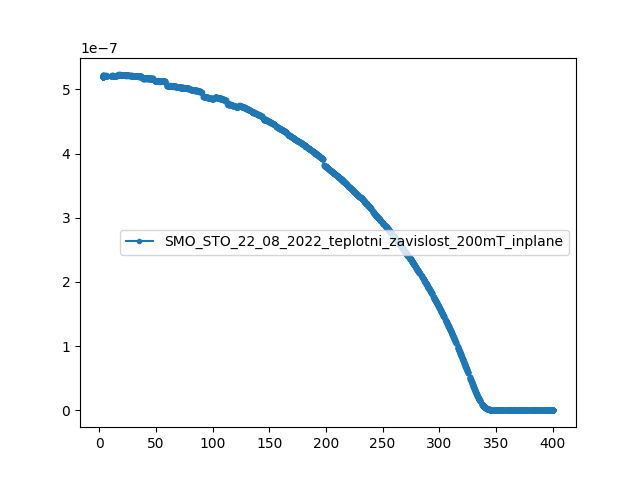

In [6]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


# plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

for i in range(1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    try:
        for filee in filename:
            data = pd.read_csv(filee, index_col=0)
            # data.plot(style = '.-')
            plt.plot(data, '.-',label = filee[-55:-4])
    except:
        print('lol no')
amp = [58,52,44,34,24,15]
# plt.plot([300,310,320,330,340,350],[i/58*9.08e-5 for i in amp],'r.-')
# 0.00013222 na 300 K, normalizace permittivity na PPMS

plt.legend()
plt.show()

---
## **Curie temperature fenomenologickej model**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3971/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_teplotni_zavislost_200mT_inplane.dat',)
334.0843245261932  +-  0.03344850795322894


C:\Users\tmale\AppData\Local\Temp/ipykernel_4200/4238452336.py:14: RuntimeWarning: invalid value encountered in power
  return mo*np.power(1-np.power(x/tc,a),b)


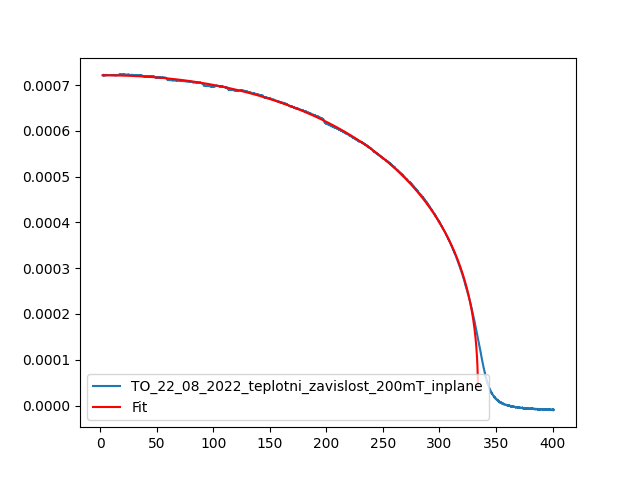

In [1]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


def fce(x,a,b,tc,mo):
    return mo*np.power(1-np.power(x/tc,a),b)

# plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

for i in range(1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee, index_col=0)
        # data.plot(style = '.-')
        plt.plot(data, label = filee[-50:-4])
        fitdata = data[data.index < 330]
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Moment (emu)']), bounds=((-np.inf, -np.inf, 300, -np.inf ), (np.inf, np.inf, 500, np.inf)))
        er = np.sqrt(np.diag(er))
        print(fit[2],' +- ',er[2] )
        plt.plot(np.arange(2,400,0.1),fce(np.arange(2,400,0.1),fit[0],fit[1],fit[2],fit[3]), 'r-', label = 'Fit')




plt.legend()
plt.show()

---
## **Curie temperature linearni fit**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3971/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_teplotni_zavislost_200mT_inplane.dat',)


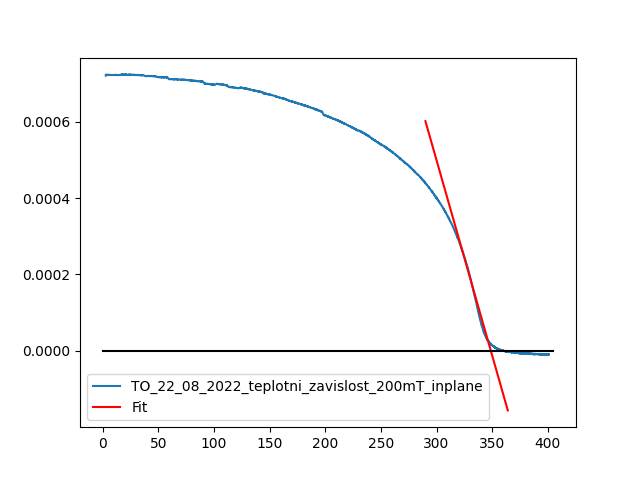

In [3]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


def fce(x,a,b):
    return a*x + b

# plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

for i in range(1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee, index_col=0)
        plt.plot(data, label = filee[-50:-4])
        min = 320
        max = 335
        fitdata = data[data.index < max]
        fitdata = fitdata[fitdata.index > min]        
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Moment (emu)']))
        er = np.sqrt(np.diag(er))
        plt.plot(np.arange(min - 30,max + 30,2),fce(np.arange(min-30,max+30,2),fit[0],fit[1]), 'r-', label = 'Fit')
        plt.plot([0,405],[0,0],'k-')




plt.legend()
plt.show()

---
## **Tc log-log skala dle Proklesky**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3978/Separovana data/PLD3978_LSMO_Nanosheet_7_2_2022_teplotni_zavislost_2000Oe_inplane.dat',)
[-42.06154361 250.02695499]
[-19.78572343 118.76332467]


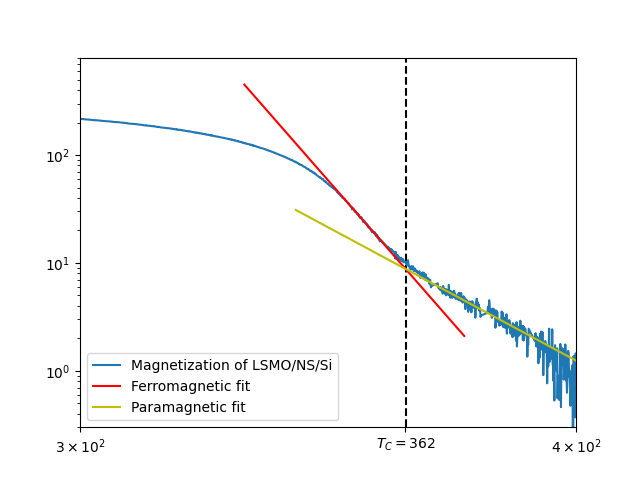

In [77]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize as opt
%matplotlib widget



def fce(x,a,b):
    return np.exp(a*np.log(x) + b)


# plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

for i in range(1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie\\PLD3971\\Separovana data 2",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee, index_col=0)
        x = data.index
        y = data['Magnetization']
        plt.yscale('log')
        plt.xscale('log')
        plt.plot([362.37,362.37],[0.3,800],'k--')
        plt.plot(x,y, label = 'Magnetization of LSMO/NS/Si')
        min = 350
        max = 355
        fitdata = data[data.index < max]
        fitdata = fitdata[fitdata.index > min]        
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Magnetization']))
        print(fit)
        er = np.sqrt(np.diag(er))
        plt.plot(np.arange(min - 20,max + 20,0.1),fce(np.arange(min-20,max+20,0.1),fit[0],fit[1]), 'r-', label = 'Ferromagnetic fit')
        min = 370
        max = 390
        fitdata = data[data.index < max]
        fitdata = fitdata[fitdata.index > min]        
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Magnetization']))
        er = np.sqrt(np.diag(er))
        print(fit)
        plt.plot(np.arange(min - 30,max + 30,0.1),fce(np.arange(min-30,max+30,0.1),fit[0],fit[1]), 'y-', label = 'Paramagnetic fit')
        
        
plt.xlim(300,400)
plt.ylim(0.3,800)
plt.xticks([300,362.335,400],[r'$3 \times 10^2$',r'$T_C = 362$',r'$4 \times 10^2$'])
plt.legend()
plt.show()

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3971/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_teplotni_zavislost_2000Oe_inplane.dat',)
[-44.39310336 262.9532315 ]
[-22.50152755 134.57944743]


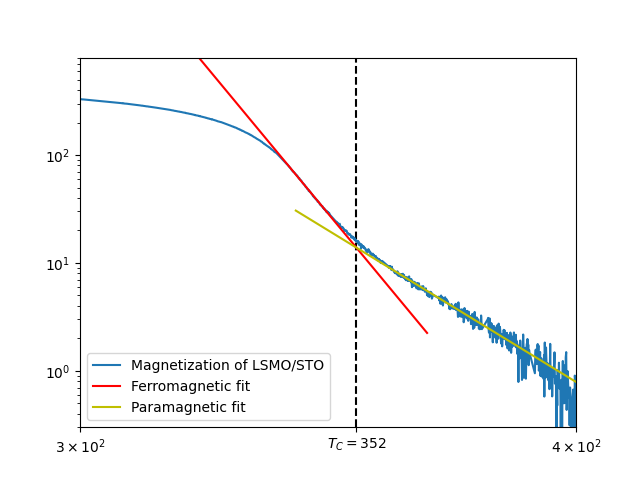

In [76]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize as opt
%matplotlib widget



def fce(x,a,b):
    return np.exp(a*np.log(x) + b)


# plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

for i in range(1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie\\PLD3971\\Separovana data 2",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee, index_col=0)
        x = data.index
        y = data['Magnetization']
        plt.yscale('log')
        plt.xscale('log')
        plt.plot([352.166,352.166],[0.3,800],'k--')
        plt.plot(x,y, label = 'Magnetization of LSMO/STO')
        min = 339
        max = 347
        fitdata = data[data.index < max]
        fitdata = fitdata[fitdata.index > min]        
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Magnetization']))
        print(fit)
        er = np.sqrt(np.diag(er))
        plt.plot(np.arange(min - 20,max + 20,0.1),fce(np.arange(min-20,max+20,0.1),fit[0],fit[1]), 'r-', label = 'Ferromagnetic fit')
        min = 370
        max = 390
        fitdata = data[data.index < max]
        fitdata = fitdata[fitdata.index > min]        
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Magnetization']))
        er = np.sqrt(np.diag(er))
        print(fit)
        plt.plot(np.arange(min - 30,max + 30,0.1),fce(np.arange(min-30,max+30,0.1),fit[0],fit[1]), 'y-', label = 'Paramagnetic fit')
        
        
plt.xlim(300,400)
plt.ylim(0.3,800)
plt.xticks([300,352.166,400],[r'$3 \times 10^2$',r'$T_C = 352$',r'$4 \times 10^2$'])
plt.legend()
plt.show()

---
## **Diamagnet linear fit**

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Magnetometrie/PLD 3971/Separovana data 2/PLD3971_LSMO_STO_22_08_2022_smycka_velka_300K.dat',)
-4.36580956510968e-09
0.0004205732163808214
-4.264236777506994e-09
-0.00042074420375727345
Prumer: -4.315023171308337e-09


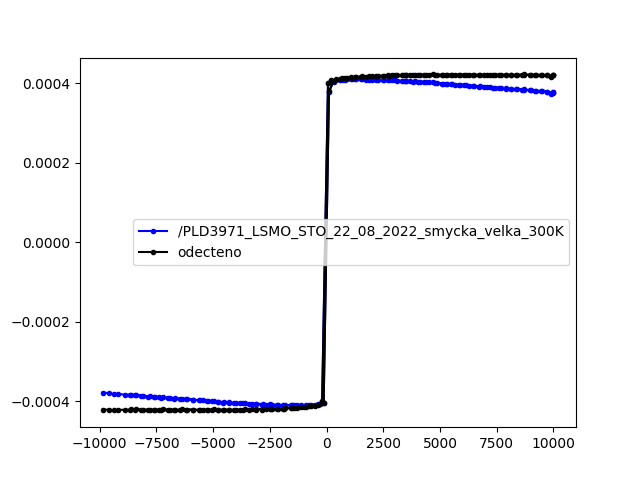

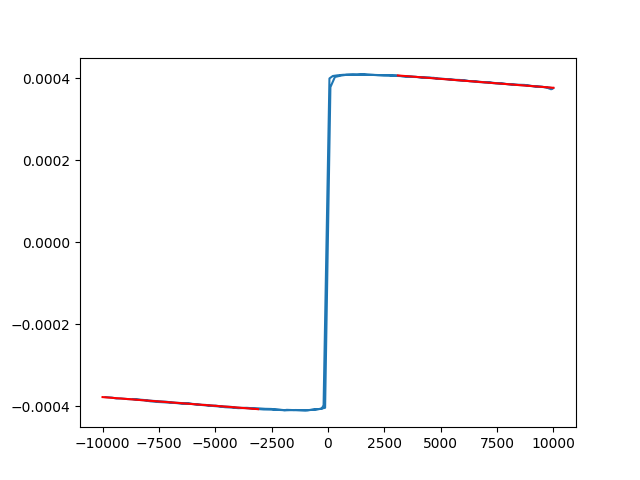

In [48]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


def fce(x,a,b):
    return a*x + b


# for i in range(1,2):
#     root = Tk()
#     root.withdraw()
#     root.call('wm', 'attributes', '.', '-topmost', True)
#     filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
#     print(filename)
#     root.destroy()
#     for filee in filename:
#         data = pd.read_csv(filee, index_col=0)
#         plt.plot(data, label = filee[-50:-4])
#         fitdata = data
#         fitdata = fitdata    
#         fit,er = cf(fce,list(fitdata.index),list(fitdata['Moment (emu)']))
#         er = np.sqrt(np.diag(er))
#         plt.plot(np.arange(-50000,50000,100),fce(np.arange(-50000,50000,100),fit[0],fit[1]), 'r-', label = 'Fit')
#         print(fit[0])
#         print(fit[1])

plt.figure()

for i in range(1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Magnetometrie",title = "Select file",filetypes = (("txt files","*.dat .txt"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee, index_col=0)
        plt.plot(data, label = filee[-50:-4])
        min = 3000
        max = 10000
        fitdata = data[data.index < max]
        fitdata = fitdata[fitdata.index > min]   
        fit,er = cf(fce,list(fitdata.index),list(fitdata['Moment (emu)']))
        er = np.sqrt(np.diag(er))
        print(fit[0])
        print(fit[1])
        fitdata2 = data[data.index < -min]
        fitdata2 = fitdata2[fitdata2.index > -max]   
        fit2,er2 = cf(fce,list(fitdata2.index),list(fitdata2['Moment (emu)']))
        er2 = np.sqrt(np.diag(er))
        plt.plot(np.arange(-max,-min,100),fce(np.arange(-max,-min,100),fit2[0],fit2[1]), 'r-', label = 'Fit')
        plt.plot(np.arange(max,min,-100),fce(np.arange(max,min,-100),fit[0],fit[1]), 'r-', label = 'Fit')
        print(fit2[0])
        print(fit2[1])
        print('Prumer: '+ str((fit[0]+fit2[0])/2))
        plt.figure()
        data = pd.read_csv(filee, index_col=0)
        plt.plot(data,'b.-', label = filee[-50:-4])
        for row in range(len(data['Moment (emu)'])):
            data.iloc[row] = data.iloc[row] - fce(data.index[row],(fit[0]+fit2[0])/2,0)
        plt.plot(data,'k.-', label = 'odecteno')
        data.to_csv(filee[:-4]+'_narovnana.dat')


plt.legend()
plt.show()